In [6]:
import librosa
import IPython
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [7]:
y_full, sr_full = librosa.load('./fanfare.wav')
IPython.display.Audio(data=y_full,rate=sr_full)

In [8]:
y,sr = librosa.load('./fanfare.wav',offset=3, duration=6)
IPython.display.Audio(data=y,rate=sr)

In [9]:
tempo, beat_frames = librosa.beat.beat_track(y=y,sr=sr)
print(tempo)

89.10290948275862


In [11]:
y_harmonic,y_percussive = librosa.effects.hpss(y)
IPython.display.Audio(data=y_harmonic,rate=sr)
IPython.display.Audio(data=y_percussive,rate=sr)

In [12]:
y_harmonic_m3, y_percussive_m3 = librosa.effects.hpss(y, margin=3.0)

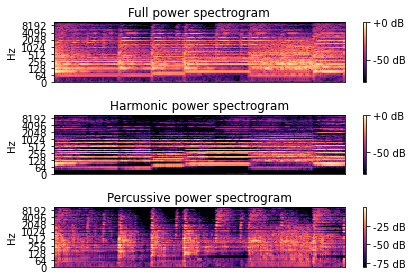

In [13]:
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D, margin=3.0)

plt.figure()
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full power spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic power spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive power spectrogram')

plt.tight_layout()
plt.show()